In [3]:
import numpy as np
import os
import pickle as pkl

In [ ]:
!pip install getdist

In [6]:
# Show plots inline, and load main getdist plot module and samples class
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

GetDist Version: 1.6.4, Matplotlib version: 3.9.2


In [7]:
Field_research_dir = os.path.abspath(os.curdir)

# 1. Flat LCDM SN only

<>:9: SyntaxWarning: invalid escape sequence '\O'
<>:9: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_27255/3338212072.py:9: SyntaxWarning: invalid escape sequence '\O'
  labels = ["\Omega_m"]


Best fit MCMC:  [ 9.99999999e-01 -1.64916698e+03]
Removed no burn in
Removed no burn in


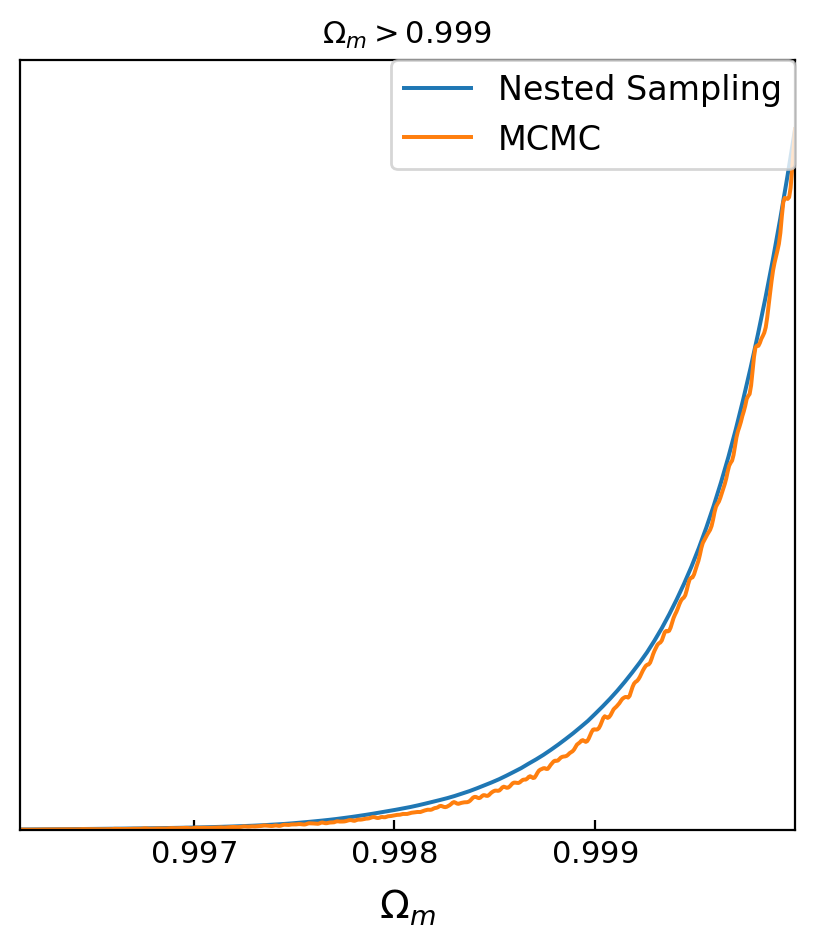

In [41]:
data = pkl.load(open(Field_research_dir + '/Results/Nested/nested_SN_flat_result.pkl', 'rb'))
results = np.load('./Results/MCMC/MCMC_flat_SN_0.npy'),np.load('./Results/MCMC/MCMC_flat_SN_1.npy'),np.load('./Results/MCMC/MCMC_flat_SN_2.npy'), np.load('./Results/MCMC/MCMC_flat_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
print('Best fit MCMC: ', Best_fit)
Loglike = MCMC_fin[-1].T
MCMC_fin =  MCMC_fin[:-1].T
labels = ["\Omega_m"]
names = ['Omegam']
samplenested = MCSamples(samples=data.samples, ranges = {'Omegam' :  (None, 1.)}, weights=data.weights, names=names, labels=labels)
sampleMCMC = MCSamples(samples=MCMC_fin, loglikes  = -Loglike, ranges = {'Omegam' :  (None, 1.)}, names=names, labels=labels)

savetitle = 'nested_SN_flat'
g = plots.get_subplot_plotter(width_inch=5)
g.triangle_plot([samplenested, sampleMCMC], filled=True, title_limit=1, legend_labels = ['Nested Sampling', 'MCMC'],
                legend_loc='upper right', contour_colors=['C0', 'C1'], contour_lw=2, contour_ls='solid')
plt.savefig(Field_research_dir + '/Figs/' + savetitle + '.png', dpi=300)
plt.show()

In [44]:
print(sampleMCMC.getLikeStats())
bestfit = sampleMCMC.paramNames.parWithName("Omegam").bestfit_sample
lower1 = sampleMCMC.paramNames.parWithName("Omegam").ND_limit_bot[0]
upper1 = sampleMCMC.paramNames.parWithName("Omegam").ND_limit_top[0]
lowerend = bestfit - lower1
upperend = upper1 - bestfit
print(
    r"$\Omega_m$ 68% n-D confidence extrema:",
    f"{lowerend:.3f}",
    f"{upperend:.3f}",
)
print(f' {1-9.9844932E-01:.3f}')

Best fit sample -log(Like) = 1649.166982
Ln(mean 1/like) = 1651.727100
mean(-Ln(like)) = 1650.165338
-Ln(mean like)  = 1649.859384
2*Var(Ln(like)) = 1.988595

parameter   bestfit        lower1         upper1         lower2         upper2
Omegam      1.0000000E+00  9.9941046E-01  1.0000000E+00  9.9844932E-01  1.0000000E+00   \Omega_m

$\Omega_m$ 68% n-D confidence extrema: 0.001 0.000
 0.002


In [1]:
print(f' {1-9.9844932E-01:.3f}')

 0.002


# 2. Curved LCDM SN only

Best fit MCMC:  [ 3.47013248e+00 -1.60828919e-01 -4.95471736e+02]
Removed no burn in
Removed no burn in


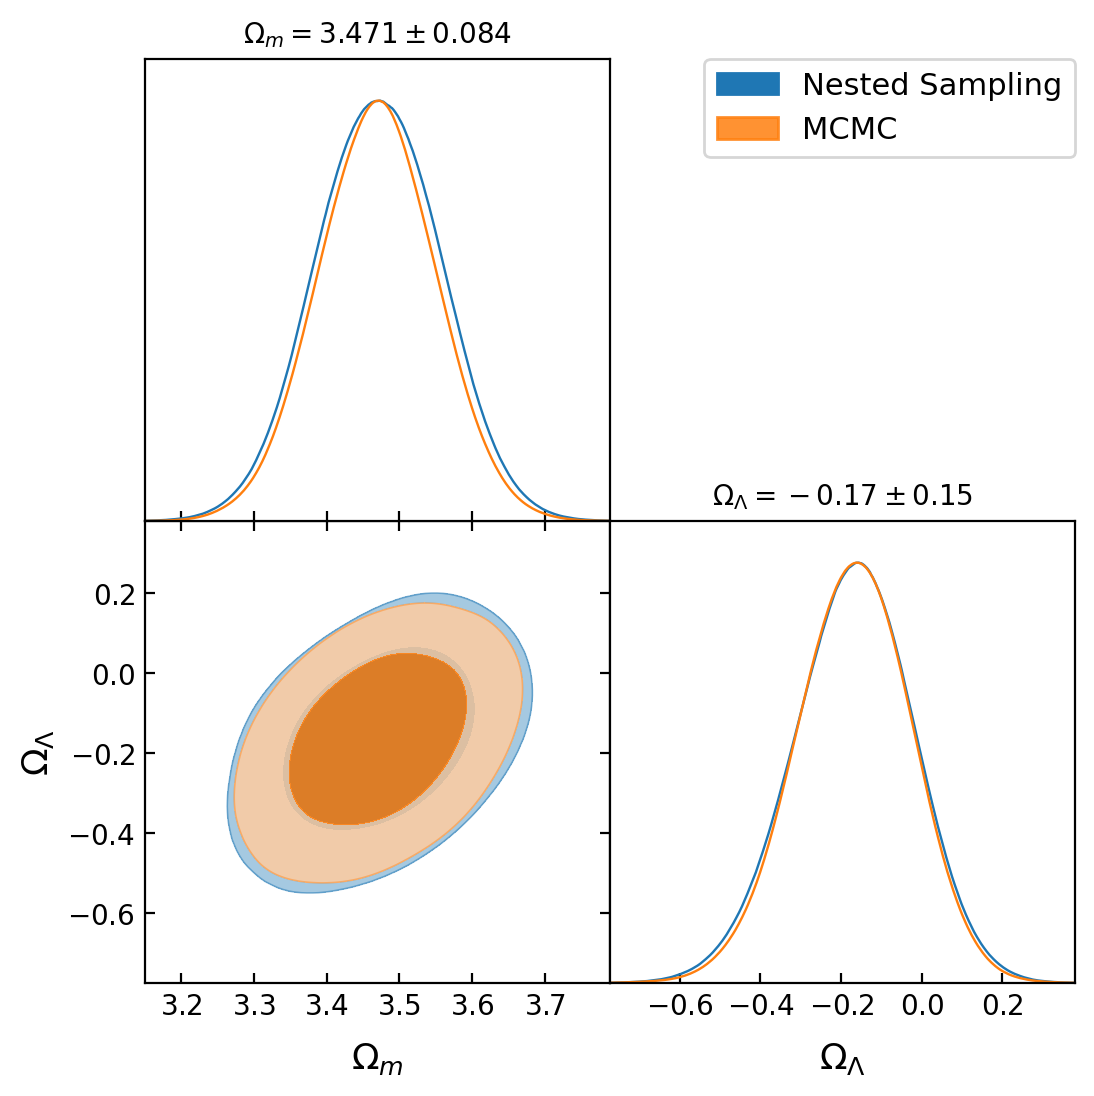

In [51]:
labels = [r"\Omega_m", r"\Omega_\Lambda"]
data_SN = pkl.load(open(Field_research_dir + '/Results/Nested/nested_SN_curved_result.pkl', 'rb'))
results = np.load(f'./Results/MCMC/MCMC_curved_SN_0.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN_1.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN_2.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN_3.npy')
burn_in = 2000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
Loglike = MCMC_fin[-1].T
print('Best fit MCMC: ', Best_fit)
MCMC_fin =  MCMC_fin[:-1].T

names = ['Omegam', 'Omegalamb']; savetitle = 'nested_SN_curved'
sample_SN = MCSamples(samples=data_SN.samples, weights=data_SN.weights, names=names, labels=labels)
sampleMCMC_SN = MCSamples(samples=MCMC_fin, loglikes=-Loglike, names=names, labels=labels)
savetitle = 'nested_SN_curved'
g = plots.get_subplot_plotter(width_inch=6)
g.triangle_plot([sample_SN, sampleMCMC_SN], filled=True, title_limit=1, legend_labels = ['Nested Sampling', 'MCMC'],
                legend_loc='upper right', contour_colors=['C0', 'C1'], contour_lw=2, contour_ls='solid')
plt.savefig(Field_research_dir + '/Figs/' + savetitle + '.png', dpi=300)
plt.show()

In [52]:
print(sampleMCMC_SN.getLikeStats())
bestfit = np.array([sampleMCMC_SN.paramNames.parWithName("Omegam").bestfit_sample, sampleMCMC_SN.paramNames.parWithName("Omegalamb").bestfit_sample])
lower2 = np.array([sampleMCMC_SN.paramNames.parWithName("Omegam").ND_limit_bot[0], sampleMCMC_SN.paramNames.parWithName("Omegalamb").ND_limit_bot[0]])
upper2 = np.array([sampleMCMC_SN.paramNames.parWithName("Omegam").ND_limit_top[0], sampleMCMC_SN.paramNames.parWithName("Omegalamb").ND_limit_top[0]])
lowerend = bestfit - lower2
upperend = upper2 - bestfit
print(
    r"$\Omega_m$ 95% n-D confidence extrema:",
    f"{bestfit[0]:.3f}",
    f"-{lowerend[0]:.3f}",
    f"+{upperend[0]:.3f}", '\n',
    r"$\Omega_\Lambda$ 95% n-D confidence extrema:",
    f"{bestfit[1]:.3f}",
    f"-{lowerend[1]:.3f}",
    f"+{upperend[1]:.3f}",
)

Best fit sample -log(Like) = 495.471736
Ln(mean 1/like) = 498.196671
mean(-Ln(like)) = 496.463555
-Ln(mean like)  = 496.159330
2*Var(Ln(like)) = 2.000529

parameter   bestfit        lower1         upper1         lower2         upper2
Omegam      3.4701325E+00  3.3497402E+00  3.5907486E+00  3.2745183E+00  3.6667181E+00   \Omega_m
Omegalamb  -1.6082892E-01 -3.8372950E-01  4.9062375E-02 -5.2740420E-01  1.7532813E-01   \Omega_\Lambda

$\Omega_m$ 95% n-D confidence extrema: 3.470 -0.120 +0.121 
 $\Omega_\Lambda$ 95% n-D confidence extrema: -0.161 -0.223 +0.210


# 3. Flat LCDM BAO only

Best fit MCMC:  [   0.99999899   31.67660306 -157.40404106]
Removed no burn in
Removed no burn in


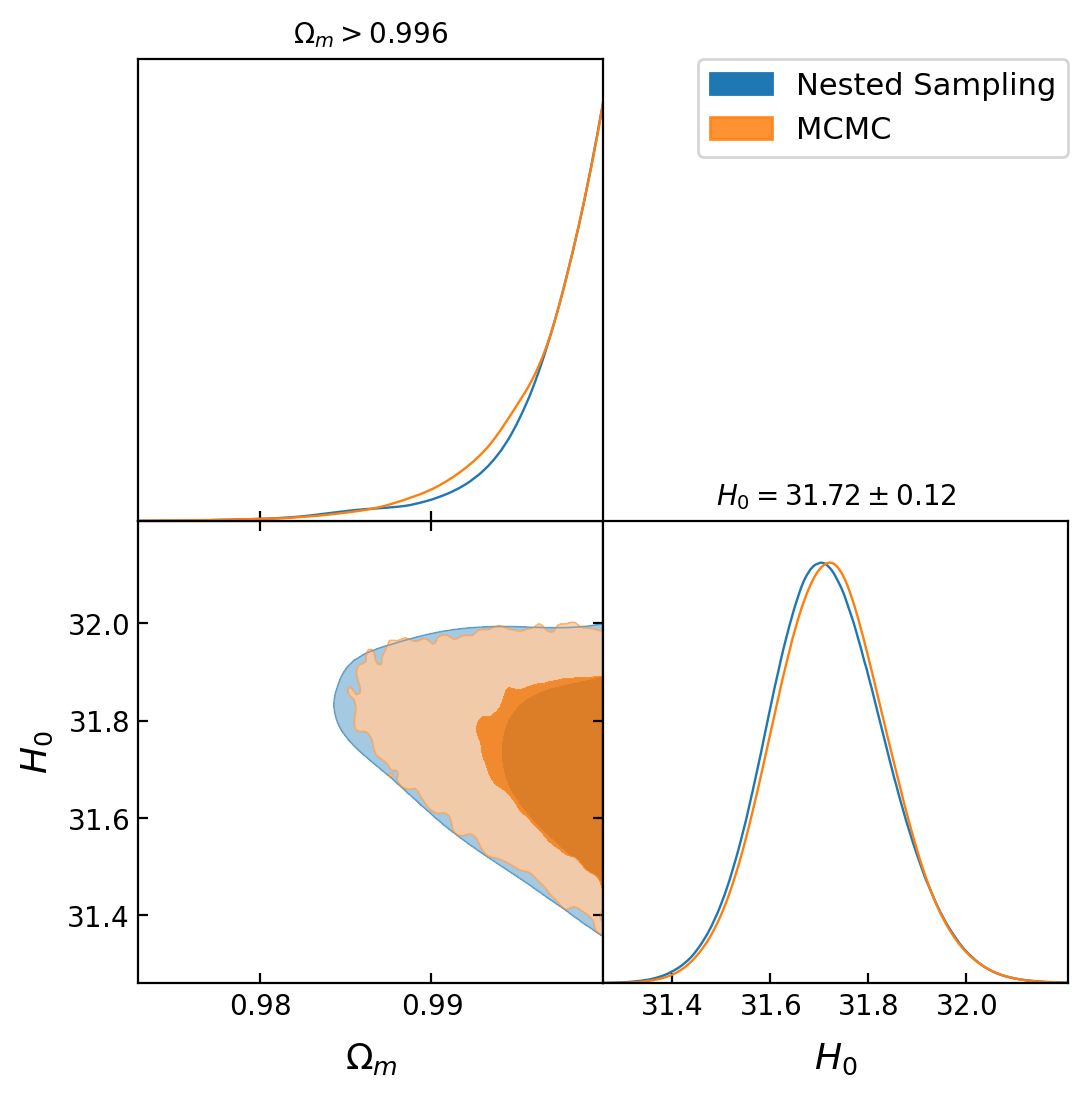

In [53]:
labels = [r"\Omega_m", r"H_0"]
data = pkl.load(open(Field_research_dir + '/Results/Nested/nested_BAO_flat_result.pkl', 'rb'))

results = np.load(f'./Results/MCMC/MCMC_flat_BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_flat_BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_flat_BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_flat_BAO_3.npy')
burn_in = 1000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
print('Best fit MCMC: ', Best_fit)
Loglike = MCMC_fin[-1].T
MCMC_fin =  MCMC_fin[:-1].T

names = ['Omegam', 'H0']; savetitle = 'nested_BAO_flat'
sample = MCSamples(samples=data.samples, weights=data.weights,ranges = {'Omegam' :  (None, 1.)}, names=names, labels=labels)
sampleMCMC = MCSamples(samples=MCMC_fin, loglikes = -Loglike, ranges = {'Omegam' :  (None, 1.)}, names=names, labels=labels)
savetitle = 'nested_BAO_flat'
g = plots.get_subplot_plotter(width_inch=6)
g.triangle_plot([sample, sampleMCMC], filled=True, title_limit=1, legend_labels = ['Nested Sampling', 'MCMC'],
                legend_loc='upper right', contour_colors=['C0', 'C1'], contour_lw=2, contour_ls='solid')
plt.savefig(Field_research_dir + '/Figs/' + savetitle + '.png', dpi=300)
plt.show()

In [54]:
print(sampleMCMC.getLikeStats())
bestfit = np.array([sampleMCMC.paramNames.parWithName("Omegam").bestfit_sample, sampleMCMC.paramNames.parWithName("H0").bestfit_sample])
lower2 = np.array([sampleMCMC.paramNames.parWithName("Omegam").ND_limit_bot[0], sampleMCMC.paramNames.parWithName("H0").ND_limit_bot[0]])
upper2 = np.array([sampleMCMC.paramNames.parWithName("Omegam").ND_limit_top[0], sampleMCMC.paramNames.parWithName("H0").ND_limit_top[0]])
lowerend = bestfit - lower2
upperend = upper2 - bestfit
print(
    r"$\Omega_m$ 95% n-D confidence extrema:",
    f"{bestfit[0]:.3f}",
    f"-{lowerend[0]:.3f}",
    f"+{upperend[0]:.3f}", '\n',
    r"$H_0$ 95% n-D confidence extrema:",
    f"{bestfit[1]:.3f}",
    f"-{lowerend[1]:.3f}",
    f"+{upperend[1]:.3f}",
)

Best fit sample -log(Like) = 157.404041
Ln(mean 1/like) = 160.867644
mean(-Ln(like)) = 158.898577
-Ln(mean like)  = 158.441072
2*Var(Ln(like)) = 2.953659

parameter   bestfit        lower1         upper1         lower2         upper2
Omegam      9.9999899E-01  9.9330056E-01  9.9999990E-01  9.8525762E-01  9.9999990E-01   \Omega_m
H0          3.1676603E+01  3.1477987E+01  3.1886213E+01  3.1383247E+01  3.1991754E+01   H_0

$\Omega_m$ 95% n-D confidence extrema: 1.000 -0.007 +0.000 
 $H_0$ 95% n-D confidence extrema: 31.677 -0.199 +0.210


# 4. Curved LCDM BAO only

Best fit MCMC:  [ 4.53452696 -0.34658089 18.12441992 -7.58802551]
Removed no burn in
Removed no burn in


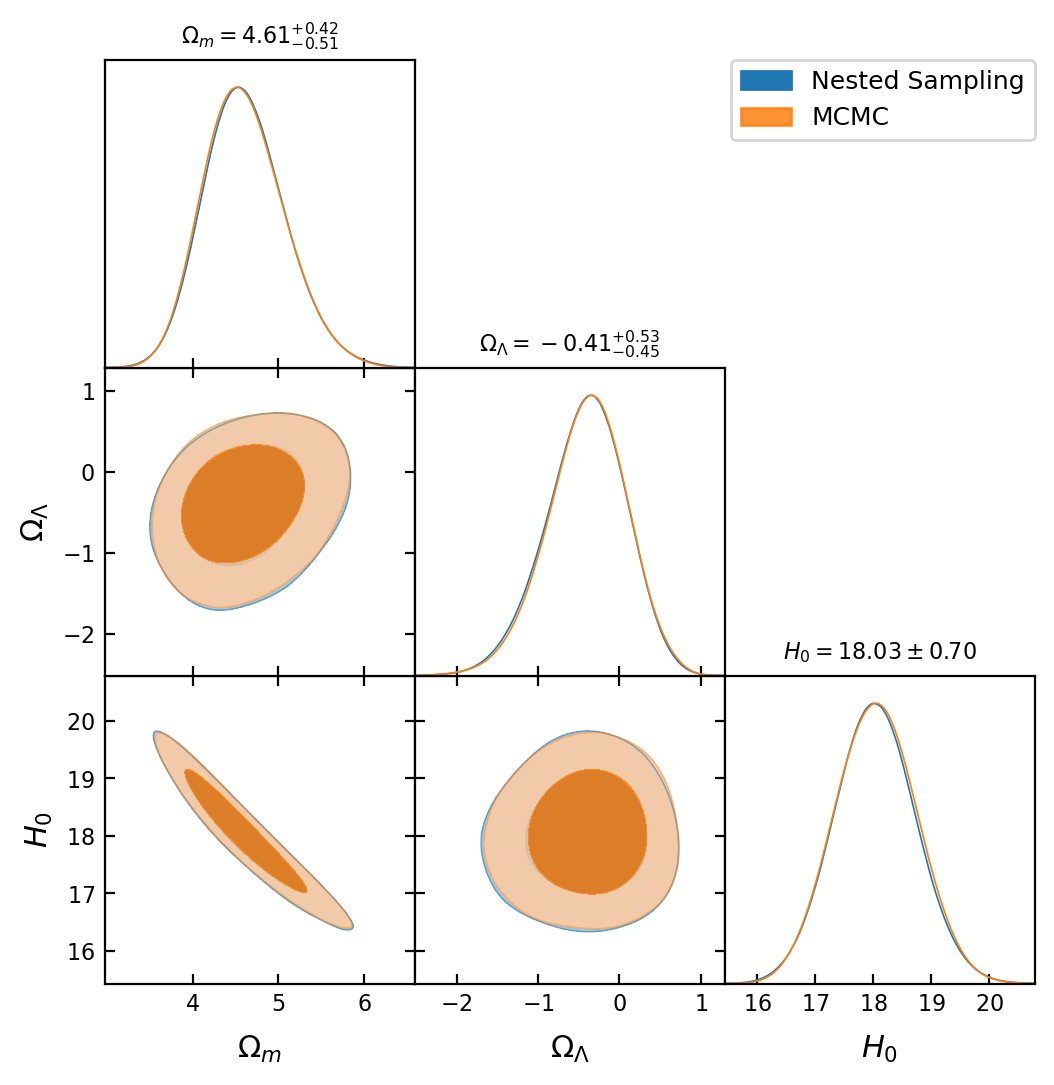

In [55]:
labels = [r"\Omega_m", r"\Omega_\Lambda", r"H_0"]
data_BAO = pkl.load(open(Field_research_dir + '/Results/Nested/nested_BAO_curved_result.pkl', 'rb'))
results = np.load(f'./Results/MCMC/MCMC_curved_BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_curved_BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_curved_BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_curved_BAO_3.npy')
burn_in = 200
MCMC_test = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_test[:,np.argmax(MCMC_test[-1])]
print('Best fit MCMC: ', Best_fit)
Loglike = MCMC_test[-1].T
MCMC_test =  MCMC_test[:-1].T

title = 'BAO only curved LCDM cosmology nested sampling result'
names = ['Omegam', 'Omegalamb','H0']; savetitle = 'nested_BAO_curved'
sample_BAO = MCSamples(samples=data_BAO.samples, weights=data_BAO.weights, names=names, labels=labels)
sampleMCMC = MCSamples(samples=MCMC_test, loglikes=-Loglike, names=names, labels=labels)
savetitle = 'nested_BAO_curved'
g = plots.get_subplot_plotter(width_inch=6)
g.triangle_plot([sample_BAO, sampleMCMC], filled=True, title_limit=1, legend_labels = ['Nested Sampling', 'MCMC'],
                legend_loc='upper right', contour_colors=['C0', 'C1'], contour_lw=2, contour_ls='solid')
plt.savefig(Field_research_dir + '/Figs/' + savetitle + '.png', dpi=300)
plt.show()

In [56]:
print(sampleMCMC.getLikeStats())
bestfit = np.array([sampleMCMC.paramNames.parWithName("Omegam").bestfit_sample,
                    sampleMCMC.paramNames.parWithName("Omegalamb").bestfit_sample,
                    sampleMCMC.paramNames.parWithName("H0").bestfit_sample])
lower2 = np.array([sampleMCMC.paramNames.parWithName("Omegam").ND_limit_bot[0],
                   sampleMCMC.paramNames.parWithName("Omegalamb").ND_limit_bot[0],
                   sampleMCMC.paramNames.parWithName("H0").ND_limit_bot[0]])
upper2 = np.array([sampleMCMC.paramNames.parWithName("Omegam").ND_limit_top[0],
                   sampleMCMC.paramNames.parWithName("Omegalamb").ND_limit_top[0],
                   sampleMCMC.paramNames.parWithName("H0").ND_limit_top[0]])
lowerend = bestfit - lower2
upperend = upper2 - bestfit
print(
    r"$\Omega_m$ 95% n-D confidence extrema:",
    f"{bestfit[0]:.3f}",
    f"-{lowerend[0]:.3f}",
    f"+{upperend[0]:.3f}", '\n',
    r"$\Omega_\Lambda$ 95% n-D confidence extrema:",
    f"{bestfit[1]:.3f}",
    f"-{lowerend[1]:.3f}",
    f"+{upperend[1]:.3f}", '\n',
    r"$H_0$ 95% n-D confidence extrema:",
    f"{bestfit[2]:.3f}",
    f"-{lowerend[2]:.3f}",
    f"+{upperend[2]:.3f}",
)

Best fit sample -log(Like) = 7.588026
Ln(mean 1/like) = 11.008267
mean(-Ln(like)) = 9.094637
-Ln(mean like)  = 8.634233
2*Var(Ln(like)) = 2.941594

parameter   bestfit        lower1         upper1         lower2         upper2
Omegam      4.5345270E+00  3.7549756E+00  5.4844284E+00  3.4328863E+00  6.0207569E+00   \Omega_m
Omegalamb  -3.4658089E-01 -1.3397057E+00  4.9943467E-01 -1.8790868E+00  8.8009896E-01   \Omega_\Lambda
H0          1.8124420E+01  1.6833035E+01  1.9450169E+01  1.6205616E+01  2.0076882E+01   H_0

$\Omega_m$ 95% n-D confidence extrema: 4.535 -0.780 +0.950 
 $\Omega_\Lambda$ 95% n-D confidence extrema: -0.347 -0.993 +0.846 
 $H_0$ 95% n-D confidence extrema: 18.124 -1.291 +1.326


# Comparison between SN and BAO only curved

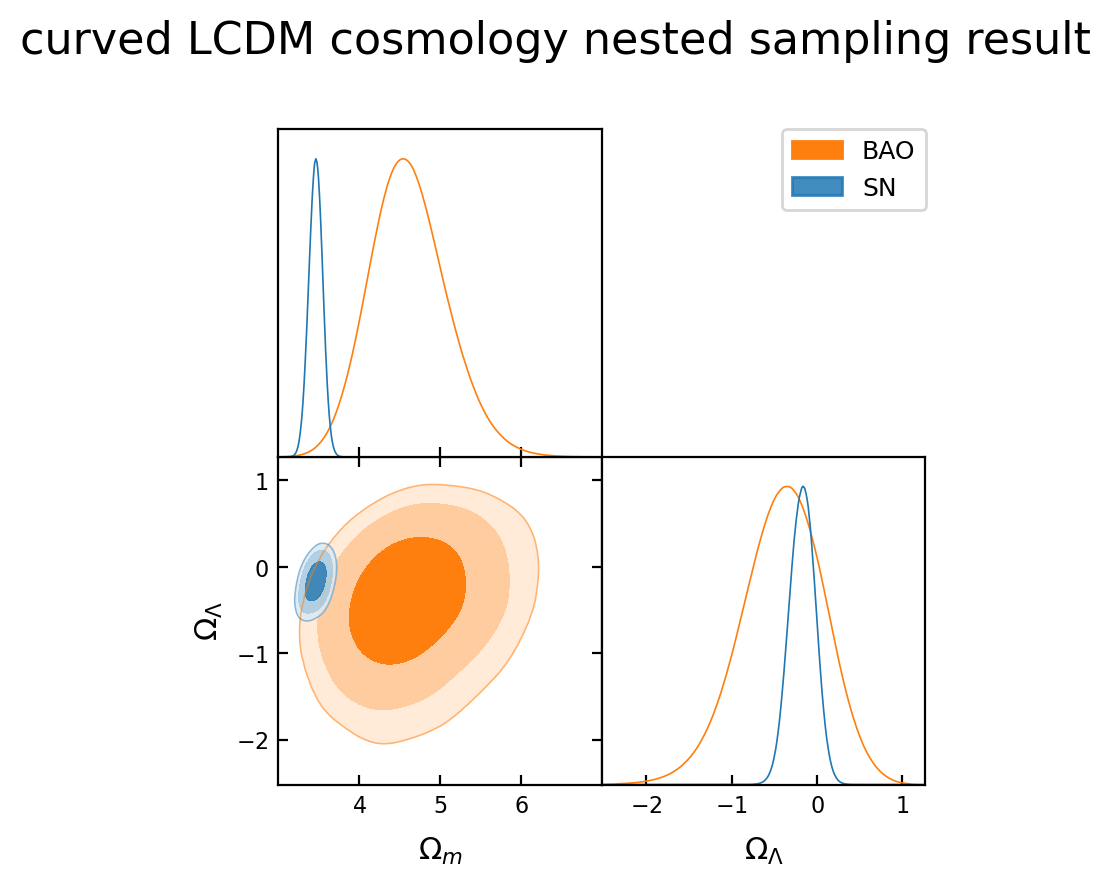

In [147]:
labels = [r"\Omega_m", r"\Omega_\Lambda"]
title = 'curved LCDM cosmology nested sampling result'
names = ['Omegam', 'Omegalamb']; savetitle = 'nested_SNvsBAO_curved'
g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 3
g.triangle_plot([sample_BAO, sample_SN], names, filled=True,
                legend_labels=['BAO', 'SN'],
                legend_loc='upper right',
                legend_fontsize=12,
                contour_colors=['C1', 'C0'], param_limits={"Omegam": (3, 7)})
plt.suptitle(title, fontsize=16, y=1.1)
plt.savefig(Field_research_dir + '/Figs/' + savetitle + '.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. SN + BAO flat

Best fit MCMC:  [ 9.99999622e-01  3.16762268e+01 -1.80657166e+03]
Removed no burn in
Removed no burn in


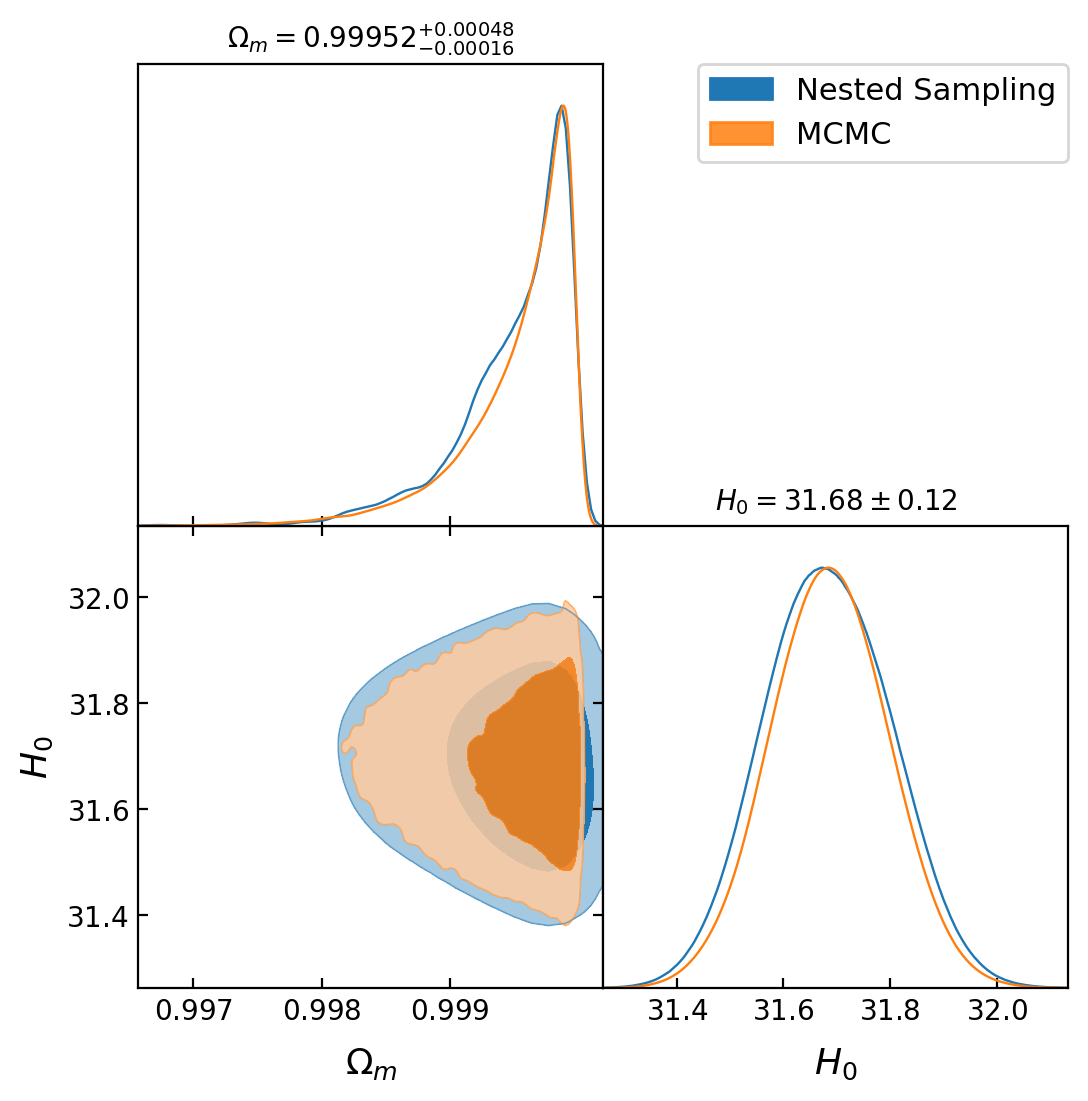

In [57]:
labels = [r"\Omega_m", r"H_0"]
data_BAO = pkl.load(open(Field_research_dir + '/Results/Nested/nested_SN_BAO_flat_result.pkl', 'rb'))
results = np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_flat_SN+BAO_3.npy')
burn_in = 1000
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
print('Best fit MCMC: ', Best_fit)
Loglike = MCMC_fin[-1].T
MCMC_fin =  MCMC_fin[:-1].T

names = ['Omegam','H0']; savetitle = 'nested_BAO_flat'
sample_BAO = MCSamples(samples=data_BAO.samples, weights=data_BAO.weights, names=names, labels=labels)
sampleMCMC = MCSamples(samples=MCMC_fin, loglikes=-Loglike, names=names, labels=labels)
savetitle = 'nested_SNBAO_flat'
g = plots.get_subplot_plotter(width_inch=6)
g.triangle_plot([sample_BAO, sampleMCMC], filled=True, title_limit=1, legend_labels = ['Nested Sampling', 'MCMC'],
                legend_loc='upper right', contour_colors=['C0', 'C1'], contour_lw=2, contour_ls='solid')
plt.savefig(Field_research_dir + '/Figs/' + savetitle + '.png', dpi=300)
plt.show()

In [58]:
print(sampleMCMC.getLikeStats())
bestfit = np.array([sampleMCMC.paramNames.parWithName("Omegam").bestfit_sample, 
                    sampleMCMC.paramNames.parWithName("H0").bestfit_sample])
lower2 = np.array([sampleMCMC.paramNames.parWithName("Omegam").ND_limit_bot[0], 
                   sampleMCMC.paramNames.parWithName("H0").ND_limit_bot[0]])
upper2 = np.array([sampleMCMC.paramNames.parWithName("Omegam").ND_limit_top[0], 
                   sampleMCMC.paramNames.parWithName("H0").ND_limit_top[0]])
lowerend = bestfit - lower2
upperend = upper2 - bestfit
print(
    r"$\Omega_m$ 95% n-D confidence extrema:",
    f"{bestfit[0]:.3f}",
    f"-{lowerend[0]:.3f}",
    f"+{upperend[0]:.3f}", '\n',
    r"$H_0$ 95% n-D confidence extrema:",
    f"{bestfit[1]:.3f}",
    f"-{lowerend[1]:.3f}",
    f"+{upperend[1]:.3f}",
)

Best fit sample -log(Like) = 1806.571664
Ln(mean 1/like) = 1810.115576
mean(-Ln(like)) = 1808.081733
-Ln(mean like)  = 1807.619923
2*Var(Ln(like)) = 2.999994

parameter   bestfit        lower1         upper1         lower2         upper2
Omegam      9.9999962E-01  9.9919202E-01  1.0000000E+00  9.9821991E-01  1.0000000E+00   \Omega_m
H0          3.1676227E+01  3.1473988E+01  3.1887137E+01  3.1374810E+01  3.1986912E+01   H_0

$\Omega_m$ 95% n-D confidence extrema: 1.000 -0.001 +0.000 
 $H_0$ 95% n-D confidence extrema: 31.676 -0.202 +0.211


# 6. SN + BAO curved

In [52]:
Loglike.min()

-518.7484636818872

Best fit MCMC:  [ 3.51011072e+00 -1.95143740e-01  2.00921949e+01 -5.03973324e+02]
Removed no burn in
Removed no burn in


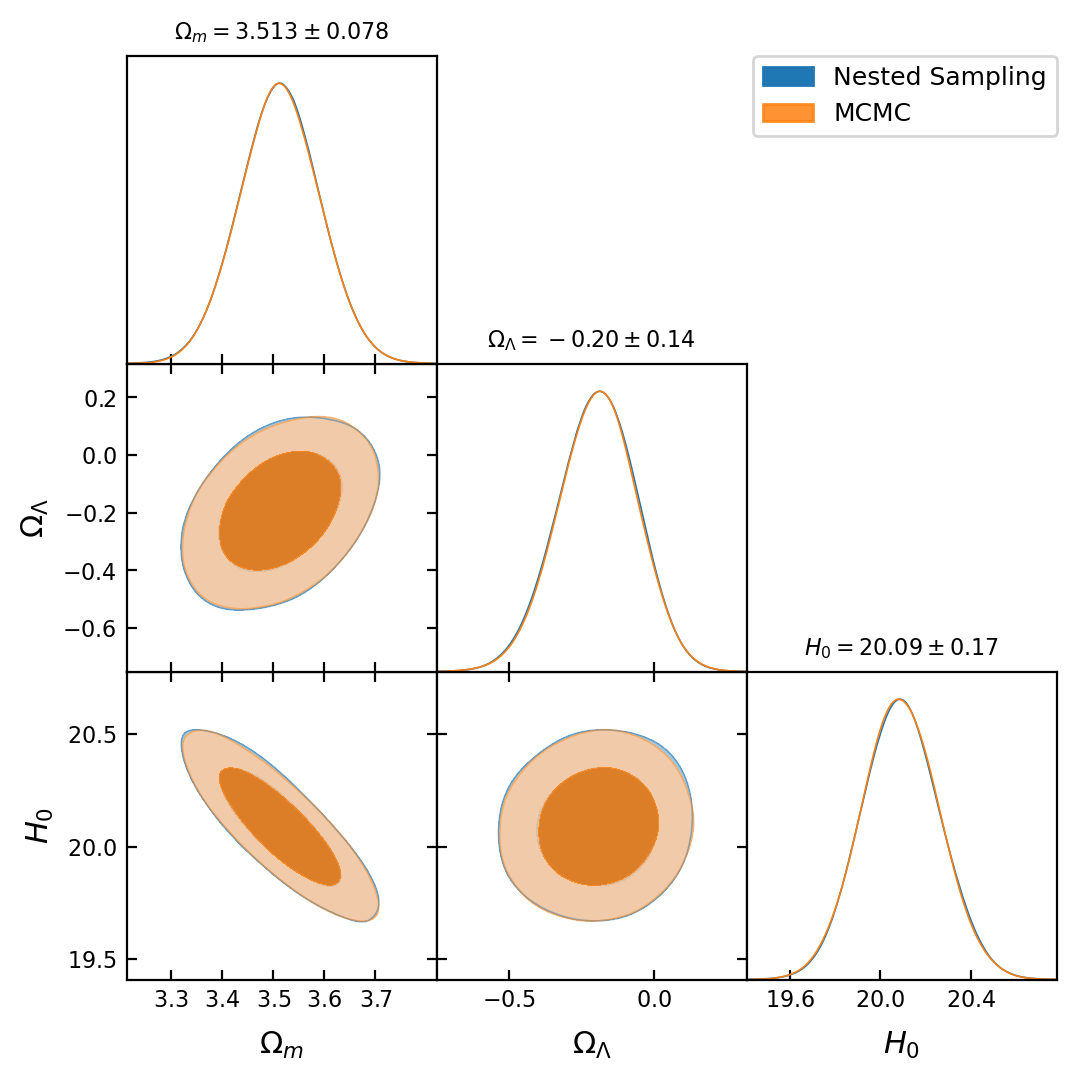

In [59]:
labels = [r"\Omega_m",r"\Omega_\Lambda", r"H_0"]
data_SNBAO = pkl.load(open(Field_research_dir + '/Results/Nested/nested_SN_BAO_curved_result.pkl', 'rb'))

results = np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_0.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_1.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_2.npy'), np.load(f'./Results/MCMC/MCMC_curved_SN+BAO_3.npy')
burn_in = 500
MCMC_fin = np.concatenate((results[0][:, burn_in:], results[1][:, burn_in:], results[2][:, burn_in:], results[3][:, burn_in:]), axis=1)
Best_fit = MCMC_fin[:,np.argmax(MCMC_fin[-1])]
print('Best fit MCMC: ', Best_fit)
Loglike = MCMC_fin[-1].T
MCMC_fin =  MCMC_fin[:-1].T

names = ['Omegam','Omegalamb','H0']; savetitle = 'nested_SNBAO_curved'
sample_SNBAO = MCSamples(samples=data_SNBAO.samples, weights=data_SNBAO.weights, names=names, labels=labels)
sampleMCMC_SNBAO = MCSamples(samples=MCMC_fin, loglikes=-Loglike, names=names, labels=labels)
savetitle = 'nested_SNBAO_curved'
g = plots.get_subplot_plotter(width_inch=6)
g.triangle_plot([sample_SNBAO, sampleMCMC_SNBAO], filled=True, title_limit=1, legend_labels = ['Nested Sampling', 'MCMC'],
                legend_loc='upper right', contour_colors=['C0', 'C1'], contour_lw=2, contour_ls='solid')
plt.savefig(Field_research_dir + '/Figs/' + savetitle + '.png', dpi=300)
plt.show()

In [60]:
print(sampleMCMC_SNBAO.getLikeStats())
bestfit = np.array([sampleMCMC_SNBAO.paramNames.parWithName("Omegam").bestfit_sample,
                    sampleMCMC_SNBAO.paramNames.parWithName("Omegalamb").bestfit_sample,
                    sampleMCMC_SNBAO.paramNames.parWithName("H0").bestfit_sample])
lower2 = np.array([sampleMCMC_SNBAO.paramNames.parWithName("Omegam").ND_limit_bot[0],
                   sampleMCMC_SNBAO.paramNames.parWithName("Omegalamb").ND_limit_bot[0],
                   sampleMCMC_SNBAO.paramNames.parWithName("H0").ND_limit_bot[0]])
upper2 = np.array([sampleMCMC_SNBAO.paramNames.parWithName("Omegam").ND_limit_top[0],
                   sampleMCMC_SNBAO.paramNames.parWithName("Omegalamb").ND_limit_top[0],
                   sampleMCMC_SNBAO.paramNames.parWithName("H0").ND_limit_top[0]])
lowerend = bestfit - lower2
upperend = upper2 - bestfit
print(
    r"$\Omega_m$ 95% n-D confidence extrema:",
    f"{bestfit[0]:.3f}",
    f"-{lowerend[0]:.3f}",
    f"+{upperend[0]:.3f}", '\n',
    r"$\Omega_\Lambda$ 95% n-D confidence extrema:",
    f"{bestfit[1]:.3f}",
    f"-{lowerend[1]:.3f}",
    f"+{upperend[1]:.3f}", '\n',
    r"$H_0$ 95% n-D confidence extrema:",
    f"{bestfit[2]:.3f}",
    f"-{lowerend[2]:.3f}",
    f"+{upperend[2]:.3f}",
)

Best fit sample -log(Like) = 503.973324
Ln(mean 1/like) = 507.403249
mean(-Ln(like)) = 505.466883
-Ln(mean like)  = 505.009988
2*Var(Ln(like)) = 2.942808

parameter   bestfit        lower1         upper1         lower2         upper2
Omegam      3.5101107E+00  3.3671657E+00  3.6585891E+00  3.2965277E+00  3.7334632E+00   \Omega_m
Omegalamb  -1.9514374E-01 -4.5141871E-01  5.6703051E-02 -5.8392671E-01  1.7353298E-01   \Omega_\Lambda
H0          2.0092195E+01  1.9769803E+01  2.0417135E+01  1.9614215E+01  2.0577642E+01   H_0

$\Omega_m$ 95% n-D confidence extrema: 3.510 -0.143 +0.148 
 $\Omega_\Lambda$ 95% n-D confidence extrema: -0.195 -0.256 +0.252 
 $H_0$ 95% n-D confidence extrema: 20.092 -0.322 +0.325


# Comparison between SN + BAO vs SN vs BAO curved

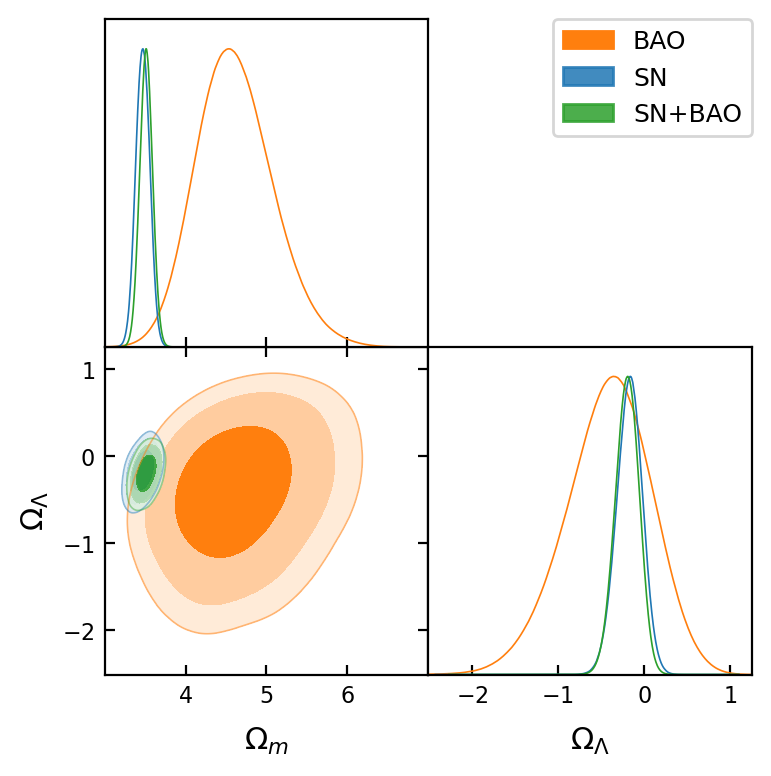

In [13]:
labels = [r"\Omega_m", r"\Omega_\Lambda"]
names = ['Omegam', 'Omegalamb']; savetitle = 'nested_SNBAOvsSNvsBAO_curved'
g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 3
g.triangle_plot([sample_BAO, sample_SN, sample_SNBAO], names, filled=True,
                legend_labels=['BAO', 'SN', 'SN+BAO'],
                legend_loc='upper right',
                legend_fontsize=12,
                contour_colors=['C1', 'C0', 'C2'], param_limits={"Omegam": (3, 7)})
plt.savefig(Field_research_dir + '/Figs/' + savetitle + '.png', dpi=300, bbox_inches='tight')
plt.show()